In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Homogeneous Markov chains
Let $X_n$ be a Markov chain with state space $S = \{1, 2, 3\}$ and transition matrix `P = np.array([[0, 2/3, 1/3], [1/3, 0, 2/3], [2/3, 1/3, 0]])`.

1. Find $P(X_0 =1,X_2 =3),P(X_0 +X_2 =4), P(X_0=1,X_2 =3|X_0 +X_2 =4)$
2. Find $\lim_{n\to \infty} P(X_n + X_{n+2} = 4)$

## Point 1

In [4]:
P = np.array([[0, 2/3, 1/3], [1/3, 0, 2/3], [2/3, 1/3, 0]])
initial_distr = [1/2, 1/2, 0]

In [5]:
num_simul = 1000
len_chain = 200
X = np.zeros((num_simul, len_chain))

states = [1, 2, 3]

# create the markov chain simulations
for i in range(num_simul):
  X[i, 0] = np.random.choice(states, 1, p=initial_distr) # initial state of each simulation is sampled from states according to the probabilities of initial_distr
  for j in range(1, len_chain):
    prev_state = int(X[i, j-1] - 1) # the -1 is because of the indices of python (0, 1, 2 rather than 1, 2, 3)
    X[i, j] = np.random.choice(states, 1, p=list(P[prev_state, :])) # after the first time step, we sample the state at time j from the possible states
    # according to the row of the transition matrix corresponding to the state at step j-1

<ipython-input-5-a5de39938801>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[i, 0] = np.random.choice(states, 1, p=initial_distr) # initial state of each simulation is sampled from states according to the probabilities of initial_distr
<ipython-input-5-a5de39938801>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[i, j] = np.random.choice(states, 1, p=list(P[prev_state, :])) # after the first time step, we sample the state at time j from the possible states


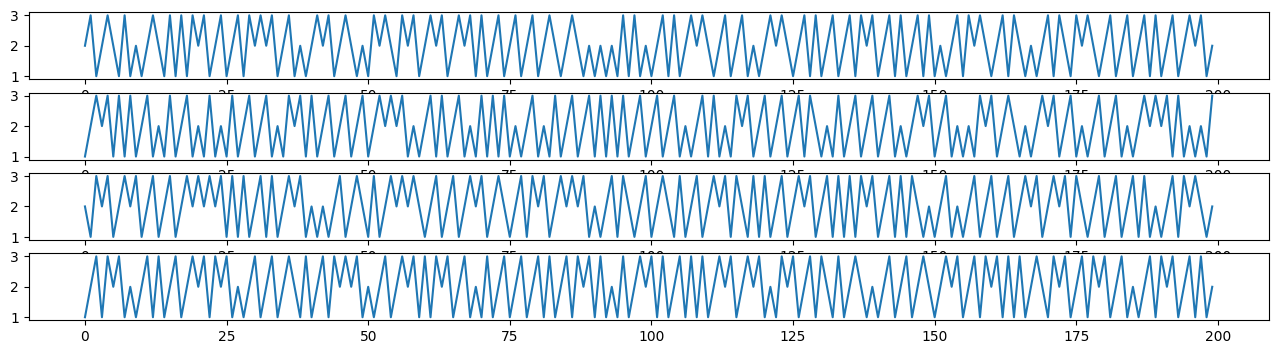

In [6]:
# let's plot some realisations
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(16, 4))
for i in range(4):
  axs[i].plot(X[i])

$P(X_0 =1,X_2 =3)$

In [5]:
print(np.mean((X[:, 0]==1) & (X[:, 2] == 3)))
print(2/9)

0.235
0.2222222222222222


$P(X_0 +X_2 =4)$

In [6]:
print(np.mean((X[:, 0]+X[:, 2] == 4)))
print(4/9)

0.455
0.4444444444444444


$P(X_0=1,X_2 =3|X_0 +X_2 =4)$

In [7]:
print(np.sum((X[:, 0]==1) & (X[:, 2] == 3)) / np.sum((X[:, 0]+X[:, 2] == 4)))
print(1/2)

0.5164835164835165
0.5


##  Point 2

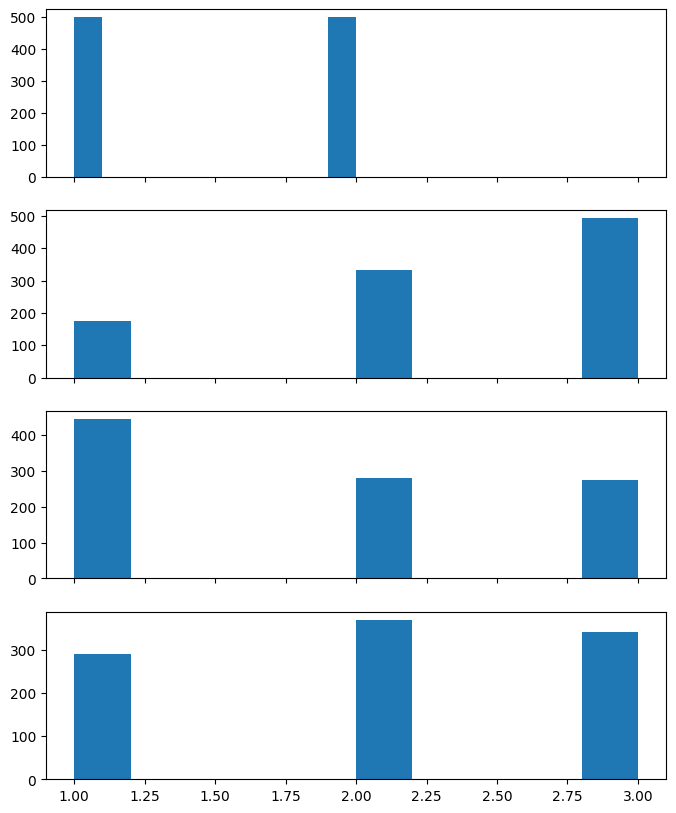

In [9]:
# let's look at the marginal distribution of the first 4 time steps
# unsurprisingly, the first time step is equally distributed according to the initial distribution
# the following time steps are different

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8, 10), sharex=True)
for i in range(4):
  axs[i].hist(X[:, i])

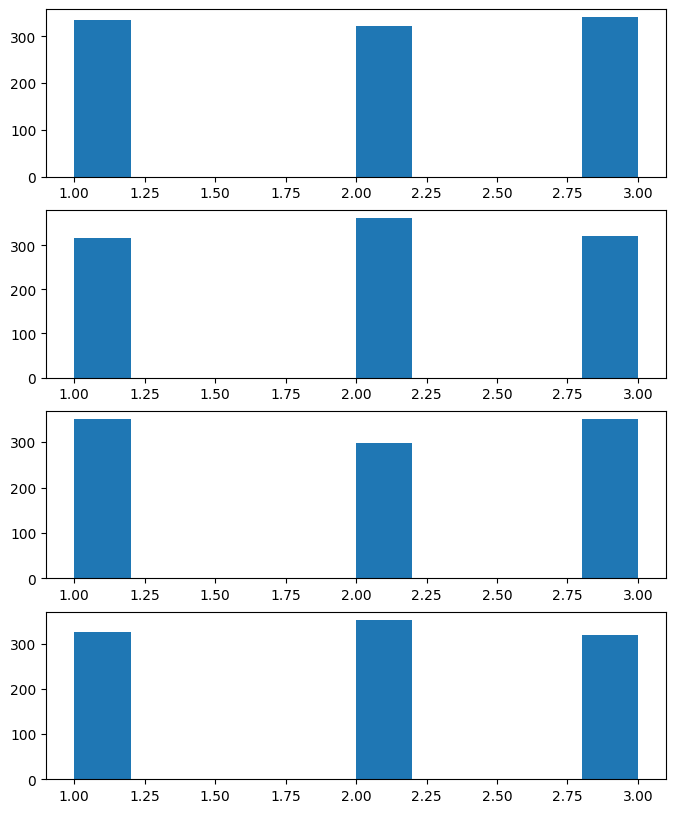

In [10]:
# let's look at the marginal distribution of the last 4 time steps
# here, we note that it seems that the marginal distribution has stabilised as a uniform over the three states

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))
for i in range(4):
  axs[i].hist(X[:, -i-1])

This result suggests us that for big n the marginal distribution is $(1/3, 1/3, 1/3)$. Let's call this distribution $\pi$.

Therefore, if our guess is true, the solution to the $\lim_{n\to \infty} P(X_n + X_{n+2} = 4)$ would be given by a similar formula to $P(X_0 + X_{2} = 4)$ (look at the computations on the board), but this time instead of conditioning on $X_0$ we condition on the value of $X_n$, whose distribution is now $\pi$. Then, $X_n=j$ happens with probability $1/3$ for each $j=1,2,3$, and then we sum the probability of the different combinations of going from j to 4-j using the transition matrix P.

We will see a theoretical explanation of $\pi$ on Monday. $\pi$ is called invariant distribution and it exists and is unique for some Markov chains.



In [15]:
1/3 * (2/3 * 2/3 + 2 * 2/3 * 1/3 + 1/3 * 1/3)
# 1/3 is the P(X_n = j)
# if X_n = 1 then X_n+2 = 4-1 = 3 and this happens with probability 2/3 * 2/3 (go from 1 to 2 to 3)
# if X_n = 2 then X_n+2 = 4-2 = 2 and this happens with probability 2/3 * 1/3 + 1/3 * 2/3 (go from 2 to 1 to 2 and from 2 to 3 to 2)
# if X_n = 3 then X_n+2 = 4-3 = 1 and this happens with probability 1/3 * 1/3 (go from 3 to 2 to 1)

0.3333333333333333

In [16]:
# to convince yourself of pi, try to compute the marginal pi(n) = initial_distr * P^n at a sufficiently big step n. You will see that after not too many steps it stabilises:
pi = initial_distr @ P
print(pi)
for _ in range(10):
  pi = pi @ P
  print(pi)

[0.16666667 0.33333333 0.5       ]
[0.44444444 0.27777778 0.27777778]
[0.27777778 0.38888889 0.33333333]
[0.35185185 0.2962963  0.35185185]
[0.33333333 0.35185185 0.31481481]
[0.32716049 0.32716049 0.34567901]
[0.33950617 0.33333333 0.32716049]
[0.32921811 0.33539095 0.33539095]
[0.33539095 0.33127572 0.33333333]
[0.33264746 0.33470508 0.33264746]
[0.33333333 0.33264746 0.3340192 ]
